# Deep learning methodology for stress sensing in FSS:- 

## FSS Deep neural networks: State of the Art Convolutional Neural Networks (VGG-16, VGG-19)

Importing all module dependencies:- 

In [7]:
import keras
import keras.backend as kb
import tensorflow as tf
from keras.models import Sequential
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from keras.applications.vgg16 import VGG16

from keras.applications.vgg19 import VGG19

from keras.models import Model
import time
from tensorflow.keras import layers, models


Using TensorFlow backend.


Loading all the raw image speckle pattern files from local hard disk of PC.

In [9]:

''''file_list1 = sorted(glob.glob('Without hysteresis/Using Actuator/new3/trial1/*.tif'),key=lambda x:float(re.findall("(\d+)",x)[2]))
file_list2 = sorted(glob.glob('Without hysteresis/Using Actuator/new3/trial2/*.tif'),key=lambda x:float(re.findall("(\d+)",x)[2]))
file_list3 = sorted(glob.glob('Without hysteresis/Using Actuator/new3/trial3/*.tif'),key=lambda x:float(re.findall("(\d+)",x)[2]))
file_list4 = sorted(glob.glob('Without hysteresis/Using Actuator/new3/trial4/*.tif'),key=lambda x:float(re.findall("(\d+)",x)[2]))
file_list5 = sorted(glob.glob('Without hysteresis/Using Actuator/new3/trial5/*.tif'),key=lambda x:float(re.findall("(\d+)",x)[2]))
file_list6 = sorted(glob.glob('Without hysteresis/Using Actuator/new3/trial6/*.tif'),key=lambda x:float(re.findall("(\d+)",x)[2]))
file_list7 = sorted(glob.glob('Without hysteresis/Using Actuator/new3/trial7/*.tif'),key=lambda x:float(re.findall("(\d+)",x)[2]))
file_list8 = sorted(glob.glob('Without hysteresis/Using Actuator/new3/trial8/*.tif'),key=lambda x:float(re.findall("(\d+)",x)[2]))
file_list9 = sorted(glob.glob('Without hysteresis/Using Actuator/new3/trial9/*.tif'),key=lambda x:float(re.findall("(\d+)",x)[2]))
file_list10 = sorted(glob.glob('Without hysteresis/Using Actuator/new3/trial10/*.tif'),key=lambda x:float(re.findall("(\d+)",x)[2]))#''''''



Using list comprehension to read multiple image files.

In [10]:
#imag1 = [cv2.imread(file1,1) for file1 in file_list1]
imag2 = [cv2.imread(file2,1) for file2 in file_list2]
imag3 = [cv2.imread(file3,1) for file3 in file_list3]
imag4 = [cv2.imread(file4,1) for file4 in file_list4]
imag5 = [cv2.imread(file5,1) for file5 in file_list5]
imag6 = [cv2.imread(file6,1) for file6 in file_list6]
imag7 = [cv2.imread(file7,1) for file7 in file_list7]
imag8 = [cv2.imread(file8,1) for file8 in file_list8]
imag9 = [cv2.imread(file9,1) for file9 in file_list9]
imag10 = [cv2.imread(file10,1) for file10 in file_list10]#'''


    


Converting list to Array of images for easy image manipulations.

In [11]:
''''images_arr1 = np.array(imag1)
#images_arr1.shape
images_arr2 = np.array(imag2)
images_arr3 = np.array(imag3)
images_arr4 = np.array(imag4)
images_arr5 = np.array(imag5)
images_arr6 = np.array(imag6)
images_arr7 = np.array(imag7)
images_arr8 = np.array(imag8)
images_arr9 = np.array(imag9)
images_arr10 = np.array(imag10)

images_arr = np.vstack((images_arr1,images_arr2,images_arr3,images_arr4,images_arr5,images_arr6,images_arr7,images_arr8,images_arr9,images_arr10))#'''


In [15]:
''''N1 = images_arr.shape[0]
W1 = images_arr.shape[2]
H1 = images_arr.shape[1]

I1 = images_arr#



15 arbitrary regions of Interest (ROIs) using "array slicing" method:-

In [17]:
''''Ibc1 = I1[0:7,0:100,0:100] 
Ibc2 = I1[0:7,10:110,10:110] 
Ibc3 = I1[0:7,20:120,20:120]
Ibc4 = I1[0:7,0:100,10:110] 
Ibc5 = I1[0:7,0:100,20:120] 
Ibc6 = I1[0:7,200:300,200:300] 
Ibc7 = I1[0:7,50:150,0:100] 
Ibc8 = I1[0:7,50:150,10:110] 
Ibc9 = I1[0:7,200:300,120:220] 
Ibc10 = I1[0:7,150:250,150:250] 
Ibc11 = I1[0:7,160:260,160:260] 
Ibc12 = I1[0:7,160:260,0:100] 
Ibc13 = I1[0:7,150:250,40:140] 
Ibc14 = I1[0:7,100:200,0:100] 
Ibc15 = I1[0:7,100:200,30:130] 

Ibc16 = I1[7:14,0:100,0:100] 
Ibc17 = I1[7:14,10:110,10:110] 
Ibc18 = I1[7:14,20:120,20:120]
Ibc19 = I1[7:14,0:100,10:110] 
Ibc20 = I1[7:14,0:100,20:120] 
Ibc21 = I1[7:14,200:300,200:300] 
Ibc22 = I1[7:14,50:150,0:100] 
Ibc23 = I1[7:14,50:150,10:110] 
Ibc24 = I1[7:14,200:300,120:220] 
Ibc25 = I1[7:14,150:250,150:250] 
Ibc26 = I1[7:14,160:260,160:260] 
Ibc27 = I1[7:14,160:260,0:100] 
Ibc28 = I1[7:14,150:250,40:140] 
Ibc29 = I1[7:14,100:200,0:100] 
Ibc30 = I1[7:14,100:200,30:130] 

Ibc31 = I1[14:21,0:100,0:100] 
Ibc32 = I1[14:21,10:110,10:110] 
Ibc33 = I1[14:21,20:120,20:120]
Ibc34 = I1[14:21,0:100,10:110] 
Ibc35 = I1[14:21,0:100,20:120] 
Ibc36 = I1[14:21,200:300,200:300] 
Ibc37 = I1[14:21,50:150,0:100] 
Ibc38 = I1[14:21,50:150,10:110] 
Ibc39 = I1[14:21,200:300,120:220] 
Ibc40 = I1[14:21,150:250,150:250] 
Ibc41 = I1[14:21,160:260,160:260] 
Ibc42 = I1[14:21,160:260,0:100] 
Ibc43 = I1[14:21,150:250,40:140] 
Ibc44 = I1[14:21,100:200,0:100] 
Ibc45 = I1[14:21,100:200,30:130] 

Ibc46 = I1[21:28,0:100,0:100] 
Ibc47 = I1[21:28,10:110,10:110] 
Ibc48 = I1[21:28,20:120,20:120]
Ibc49 = I1[21:28,0:100,10:110] 
Ibc50 = I1[21:28,0:100,20:120] 
Ibc51 = I1[21:28,200:300,200:300] 
Ibc52 = I1[21:28,50:150,0:100] 
Ibc53 = I1[21:28,50:150,10:110] 
Ibc54 = I1[21:28,200:300,120:220] 
Ibc55 = I1[21:28,150:250,150:250] 
Ibc56 = I1[21:28,160:260,160:260] 
Ibc57 = I1[21:28,160:260,0:100] 
Ibc58 = I1[21:28,150:250,40:140] 
Ibc59 = I1[21:28,100:200,0:100] 
Ibc60 = I1[21:28,100:200,30:130]

Ibc61 = I1[28:35,0:100,0:100] 
Ibc62 = I1[28:35,10:110,10:110] 
Ibc63 = I1[28:35,20:120,20:120]
Ibc64 = I1[28:35,0:100,10:110] 
Ibc65 = I1[28:35,0:100,20:120] 
Ibc66 = I1[28:35,200:300,200:300] 
Ibc67 = I1[28:35,50:150,0:100] 
Ibc68 = I1[28:35,50:150,10:110] 
Ibc69 = I1[28:35,200:300,120:220] 
Ibc70 = I1[28:35,150:250,150:250] 
Ibc71 = I1[28:35,160:260,160:260] 
Ibc72 = I1[28:35,160:260,0:100] 
Ibc73 = I1[28:35,150:250,40:140] 
Ibc74 = I1[28:35,100:200,0:100] 
Ibc75 = I1[28:35,100:200,30:130]

Ibc76 = I1[35:42,0:100,0:100] 
Ibc77 = I1[35:42,10:110,10:110] 
Ibc78 = I1[35:42,20:120,20:120]
Ibc79 = I1[35:42,0:100,10:110] 
Ibc80 = I1[35:42,0:100,20:120] 
Ibc81 = I1[35:42,200:300,200:300] 
Ibc82 = I1[35:42,50:150,0:100] 
Ibc83 = I1[35:42,50:150,10:110] 
Ibc84 = I1[35:42,200:300,120:220] 
Ibc85 = I1[35:42,150:250,150:250] 
Ibc86 = I1[35:42,160:260,160:260] 
Ibc87 = I1[35:42,160:260,0:100] 
Ibc88 = I1[35:42,150:250,40:140] 
Ibc89 = I1[35:42,100:200,0:100] 
Ibc90 = I1[35:42,100:200,30:130]

Ibc91 = I1[42:49,0:100,0:100] 
Ibc92 = I1[42:49,10:110,10:110] 
Ibc93 = I1[42:49,20:120,20:120]
Ibc94 = I1[42:49,0:100,10:110] 
Ibc95 = I1[42:49,0:100,20:120] 
Ibc96 = I1[42:49,200:300,200:300] 
Ibc97 = I1[42:49,50:150,0:100] 
Ibc98 = I1[42:49,50:150,10:110] 
Ibc99 = I1[42:49,200:300,120:220] 
Ibc100 = I1[42:49,150:250,150:250] 
Ibc101 = I1[42:49,160:260,160:260] 
Ibc102 = I1[42:49,160:260,0:100] 
Ibc103 = I1[42:49,150:250,40:140] 
Ibc104 = I1[42:49,100:200,0:100] 
Ibc105 = I1[42:49,100:200,30:130]

Ibc106 = I1[49:56,0:100,0:100] 
Ibc107= I1[49:56,10:110,10:110] 
Ibc108 = I1[49:56,20:120,20:120]
Ibc109 = I1[49:56,0:100,10:110] 
Ibc110 = I1[49:56,0:100,20:120] 
Ibc111 = I1[49:56,200:300,200:300] 
Ibc112 = I1[49:56,50:150,0:100] 
Ibc113 = I1[49:56,50:150,10:110] 
Ibc114 = I1[49:56,200:300,120:220] 
Ibc115 =I1[49:56,150:250,150:250] 
Ibc116 =I1[49:56,160:260,160:260] 
Ibc117 =I1[49:56,160:260,0:100] 
Ibc118 =I1[49:56,150:250,40:140] 
Ibc119 =I1[49:56,100:200,0:100] 
Ibc120 =I1[49:56,100:200,30:130]

Ibc121 = I1[56:63,0:100,0:100] 
Ibc122 = I1[56:63,10:110,10:110] 
Ibc123 = I1[56:63,20:120,20:120]
Ibc124 = I1[56:63,0:100,10:110] 
Ibc125 = I1[56:63,0:100,20:120] 
Ibc126 = I1[56:63,200:300,200:300] 
Ibc127 = I1[56:63,50:150,0:100] 
Ibc128 = I1[56:63,50:150,10:110] 
Ibc129 = I1[56:63,200:300,120:220] 
Ibc130 = I1[56:63,150:250,150:250] 
Ibc131 = I1[56:63,160:260,160:260] 
Ibc132 = I1[56:63,160:260,0:100] 
Ibc133 = I1[56:63,150:250,40:140] 
Ibc134 = I1[56:63,100:200,0:100] 
Ibc135 = I1[56:63,100:200,30:130]

Ibc136 = I1[63:70,0:100,0:100] 
Ibc137 = I1[63:70,10:110,10:110] 
Ibc138 = I1[63:70,20:120,20:120]
Ibc139 = I1[63:70,0:100,10:110] 
Ibc140 = I1[63:70,0:100,20:120] 
Ibc141 = I1[63:70,200:300,200:300] 
Ibc142 = I1[63:70,50:150,0:100] 
Ibc143 = I1[63:70,50:150,10:110] 
Ibc144 = I1[63:70,200:300,120:220] 
Ibc145 = I1[63:70,150:250,150:250] 
Ibc146 = I1[63:70,160:260,160:260] 
Ibc147 = I1[63:70,160:260,0:100] 
Ibc148 = I1[63:70,150:250,40:140] 
Ibc149 = I1[63:70,100:200,0:100] 
Ibc150 = I1[63:70,100:200,30:130]

Ibc = np.vstack((Ibc1,Ibc2,Ibc3,Ibc4,Ibc5,Ibc6,Ibc7,Ibc8,Ibc9,Ibc10,Ibc11,Ibc12,Ibc13,Ibc14,Ibc15,Ibc16,Ibc17,Ibc18,Ibc19,Ibc20,Ibc21,Ibc22,Ibc23,Ibc24,Ibc25,Ibc26,Ibc27,Ibc28,Ibc29,Ibc30,Ibc31,Ibc32,Ibc33,Ibc34,Ibc35,Ibc36,Ibc37,Ibc38,Ibc39,Ibc40,Ibc41,Ibc42,Ibc43,Ibc44,Ibc45,Ibc46,Ibc47,Ibc48,Ibc49,Ibc50,Ibc51,Ibc52,Ibc53,Ibc54,Ibc55,Ibc56,Ibc57,Ibc58,Ibc59,Ibc60,Ibc61,Ibc62,Ibc63,Ibc64,Ibc65,Ibc66,Ibc67,Ibc68,Ibc69,Ibc70,Ibc71,Ibc72,Ibc73,Ibc74,Ibc75,Ibc76,Ibc77,Ibc78,Ibc79,Ibc80,Ibc81,Ibc82,Ibc83,Ibc84,Ibc85,Ibc86,Ibc87,Ibc88,Ibc89,Ibc90,Ibc91,Ibc92,Ibc93,Ibc94,Ibc95,Ibc96,Ibc97,Ibc98,Ibc99,Ibc100,Ibc101,Ibc102,Ibc103,Ibc104,Ibc105,Ibc106,Ibc107,Ibc108,Ibc109,Ibc110,Ibc111,Ibc112,Ibc113,Ibc114,Ibc115,Ibc116,Ibc117,Ibc118,Ibc119,Ibc120,Ibc121,Ibc122,Ibc123,Ibc124,Ibc125,Ibc126,Ibc127,Ibc128,Ibc129,Ibc130,Ibc131,Ibc132,Ibc133,Ibc134,Ibc135,Ibc136,Ibc137,Ibc138,Ibc139,Ibc140,Ibc141,Ibc142,Ibc143,Ibc144,Ibc145,Ibc146,Ibc147,Ibc148,Ibc149,Ibc150))#'''
#Ibc.shape


Writing images to different "weights" folder for classification approach.

In [20]:
''''k1 = 0 
for i in range(0,Ibc.shape[0],7):
    cv2.imwrite('Journal Paper FSS ANN1/Actuator/Data for CNN/0 g'+"\img_"+str(k1)+".png",Ibc[i])
    k1+=1
k2 = 0 
for i in range(1,Ibc.shape[0],7):
    cv2.imwrite('Journal Paper FSS ANN1/Actuator/Data for CNN/500 g'+"\img_"+str(k2)+".png",Ibc[i])
    k2+=1  
k3 = 0 
for i in range(2,Ibc.shape[0],7):
    cv2.imwrite('Journal Paper FSS ANN1/Actuator/Data for CNN/1000 g'+"\img_"+str(k3)+".png",Ibc[i])
    k3+=1
k4 = 0 
for i in range(3,Ibc.shape[0],7):
    cv2.imwrite('Journal Paper FSS ANN1/Actuator/Data for CNN/1500 g'+"\img_"+str(k4)+".png",Ibc[i])
    k4+=1
k5 = 0 
for i in range(4,Ibc.shape[0],7):
    cv2.imwrite('Journal Paper FSS ANN1/Actuator/Data for CNN/2000 g'+"\img_"+str(k5)+".png",Ibc[i])
    k5+=1
k6 = 0 
for i in range(5,Ibc.shape[0],7):
    cv2.imwrite('Journal Paper FSS ANN1/Actuator/Data for CNN/2500 g'+"\img_"+str(k6)+".png",Ibc[i])
    k6+=1
k7 = 0 
for i in range(6,Ibc.shape[0],7):
    cv2.imwrite('Journal Paper FSS ANN1/Actuator/Data for CNN/3000 g'+"\img_"+str(k7)+".png",Ibc[i])
    k7+=1#'''

'\'k1 = 0 \nfor i in range(0,Ibc.shape[0],7):\n    cv2.imwrite(\'Journal Paper FSS ANN1/Actuator/Data for CNN/0 g\'+"\\img_"+str(k1)+".png",Ibc[i])\n    k1+=1\nk2 = 0 \nfor i in range(1,Ibc.shape[0],7):\n    cv2.imwrite(\'Journal Paper FSS ANN1/Actuator/Data for CNN/500 g\'+"\\img_"+str(k2)+".png",Ibc[i])\n    k2+=1  \nk3 = 0 \nfor i in range(2,Ibc.shape[0],7):\n    cv2.imwrite(\'Journal Paper FSS ANN1/Actuator/Data for CNN/1000 g\'+"\\img_"+str(k3)+".png",Ibc[i])\n    k3+=1\nk4 = 0 \nfor i in range(3,Ibc.shape[0],7):\n    cv2.imwrite(\'Journal Paper FSS ANN1/Actuator/Data for CNN/1500 g\'+"\\img_"+str(k4)+".png",Ibc[i])\n    k4+=1\nk5 = 0 \nfor i in range(4,Ibc.shape[0],7):\n    cv2.imwrite(\'Journal Paper FSS ANN1/Actuator/Data for CNN/2000 g\'+"\\img_"+str(k5)+".png",Ibc[i])\n    k5+=1\nk6 = 0 \nfor i in range(5,Ibc.shape[0],7):\n    cv2.imwrite(\'Journal Paper FSS ANN1/Actuator/Data for CNN/2500 g\'+"\\img_"+str(k6)+".png",Ibc[i])\n    k6+=1\nk7 = 0 \nfor i in range(6,Ibc.shape[0],

Loading files from local hard disk of PC.

In [ ]:
''''fil0 = sorted(glob.glob('Journal Paper FSS ANN1/Actuator/Data for CNN/0 g/*.png'),key=lambda x:float(re.findall("(\d+)",x)[2])) 
fil1 = sorted(glob.glob('Journal Paper FSS ANN1/Actuator/Data for CNN/500 g/*.png'),key=lambda x:float(re.findall("(\d+)",x)[2]))
fil2 = sorted(glob.glob('Journal Paper FSS ANN1/Actuator/Data for CNN/1000 g/*.png'),key=lambda x:float(re.findall("(\d+)",x)[2]))
fil3 = sorted(glob.glob('Journal Paper FSS ANN1/Actuator/Data for CNN/1500 g/*.png'),key=lambda x:float(re.findall("(\d+)",x)[2]))
fil4 = sorted(glob.glob('Journal Paper FSS ANN1/Actuator/Data for CNN/2000 g/*.png'),key=lambda x:float(re.findall("(\d+)",x)[2]))
fil5 = sorted(glob.glob('Journal Paper FSS ANN1/Actuator/Data for CNN/2500 g/*.png'),key=lambda x:float(re.findall("(\d+)",x)[2]))
fil6 = sorted(glob.glob('Journal Paper FSS ANN1/Actuator/Data for CNN/3000 g/*.png'),key=lambda x:float(re.findall("(\d+)",x)[2]))#'''


List comprehensions converted to arrays simultaneously:-

In [21]:
''''I0 = np.array([cv2.imread(file1,1) for file1 in fil0])
I1 = np.array([cv2.imread(file2,1) for file2 in fil1])
I2 = np.array([cv2.imread(file3,1) for file3 in fil2])
I3 = np.array([cv2.imread(file4,1) for file4 in fil3])
I4 = np.array([cv2.imread(file5,1) for file5 in fil4])
I5 = np.array([cv2.imread(file6,1) for file6 in fil5])
I6 = np.array([cv2.imread(file7,1) for file7 in fil6])#'''

"'I0 = np.array([cv2.imread(file1,1) for file1 in fil0])\nI1 = np.array([cv2.imread(file2,1) for file2 in fil1])\nI2 = np.array([cv2.imread(file3,1) for file3 in fil2])\nI3 = np.array([cv2.imread(file4,1) for file4 in fil3])\nI4 = np.array([cv2.imread(file5,1) for file5 in fil4])\nI5 = np.array([cv2.imread(file6,1) for file6 in fil5])\nI6 = np.array([cv2.imread(file7,1) for file7 in fil6])#"

Using ImageDatagenerator() to implement "Data Augmentation". Here, rotations,width shifting, height shifting, rescaling,shearing,zooming,horizontal flip,vertical flip transformations were introduced. 

In [22]:
''''datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        #rescale=1./255,
        shear_range=0.2,
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='reflect')#'''

"'datagen = ImageDataGenerator(\n        rotation_range=40,\n        width_shift_range=0.2,\n        height_shift_range=0.2,\n        #rescale=1./255,\n        shear_range=0.2,\n        #zoom_range=0.2,\n        horizontal_flip=True,\n        vertical_flip=True,\n        fill_mode='reflect')#"

Executing data augmentation for images in each "weights" folder and saving images in respective locations:-

In [23]:
''''I0 = I0.reshape((1,) + I0.shape)
for k in range(I0.shape[1]):
    
    a = 0
    for batch in datagen.flow(I0[:,k], batch_size=1,
                          save_to_dir='Journal Paper FSS ANN1/Actuator/Data for CNN/Aug1/0 g', save_prefix='img', save_format='png'):
        a += 1
        if a > 10:
            break#'''
''''I1 = I1.reshape((1,) + I1.shape)
for k in range(I1.shape[1]):
    
    b = 0
    for batch in datagen.flow(I1[:,k], batch_size=1,
                          save_to_dir='Journal Paper FSS ANN1/Actuator/Data for CNN/Aug1/500 g', save_prefix='img', save_format='png'):
        b += 1
        if b > 10:
            break#'''
''''I2 = I2.reshape((1,) + I2.shape)
for k in range(I2.shape[1]):
    
    c = 0
    for batch in datagen.flow(I2[:,k], batch_size=1,
                          save_to_dir='Journal Paper FSS ANN1/Actuator/Data for CNN/Aug1/1000 g', save_prefix='img', save_format='png'):
        c += 1
        if c > 10:
            break#'''
''''I3 = I3.reshape((1,) + I3.shape)
for k in range(I3.shape[1]):
    
    d = 0
    for batch in datagen.flow(I3[:,k], batch_size=1,
                          save_to_dir='Journal Paper FSS ANN1/Actuator/Data for CNN/Aug1/1500 g', save_prefix='img', save_format='png'):
        d += 1
        if d > 10:
            break#'''
''''I4 = I4.reshape((1,) + I4.shape)
for k in range(I4.shape[1]):
    
    e = 0
    for batch in datagen.flow(I4[:,k], batch_size=1,
                          save_to_dir='Journal Paper FSS ANN1/Actuator/Data for CNN/Aug1/2000 g', save_prefix='img', save_format='png'):
        e += 1
        if e > 10:
            break#'''
''''I5 = I5.reshape((1,) + I5.shape)
for k in range(I5.shape[1]):
    
    f = 0
    for batch in datagen.flow(I5[:,k], batch_size=1,
                          save_to_dir='Journal Paper FSS ANN1/Actuator/Data for CNN/Aug1/2500 g', save_prefix='img', save_format='png'):
        f += 1
        if f > 10:
            break#'''
''''I6 = I6.reshape((1,) + I6.shape)
for k in range(I6.shape[1]):
    
    g = 0
    for batch in datagen.flow(I6[:,k], batch_size=1,
                          save_to_dir='Journal Paper FSS ANN1/Actuator/Data for CNN/Aug1/3000 g', save_prefix='img', save_format='png'):
        g += 1
        if g > 10:
            break#'''

"'I6 = I6.reshape((1,) + I6.shape)\nfor k in range(I6.shape[1]):\n    \n    g = 0\n    for batch in datagen.flow(I6[:,k], batch_size=1,\n                          save_to_dir='Journal Paper FSS ANN1/Actuator/Data for CNN/Aug1/3000 g', save_prefix='img', save_format='png'):\n        g += 1\n        if g > 10:\n            break#"

Loading augmented images from saved Augmented images location:-

In [43]:
''''fil0 = sorted(glob.glob('Journal Paper FSS ANN1/Actuator/Data for CNN/Aug1/0 g/*.png'),key=lambda x:float(re.findall("(\d+)",x)[3])) 
fil1 = sorted(glob.glob('Journal Paper FSS ANN1/Actuator/Data for CNN/Aug1/500 g/*.png'),key=lambda x:float(re.findall("(\d+)",x)[3]))
fil2 = sorted(glob.glob('Journal Paper FSS ANN1/Actuator/Data for CNN/Aug1/1000 g/*.png'),key=lambda x:float(re.findall("(\d+)",x)[3]))
fil3 = sorted(glob.glob('Journal Paper FSS ANN1/Actuator/Data for CNN/Aug1/1500 g/*.png'),key=lambda x:float(re.findall("(\d+)",x)[3]))
fil4 = sorted(glob.glob('Journal Paper FSS ANN1/Actuator/Data for CNN/Aug1/2000 g/*.png'),key=lambda x:float(re.findall("(\d+)",x)[3]))
fil5 = sorted(glob.glob('Journal Paper FSS ANN1/Actuator/Data for CNN/Aug1/2500 g/*.png'),key=lambda x:float(re.findall("(\d+)",x)[3]))
fil6 = sorted(glob.glob('Journal Paper FSS ANN1/Actuator/Data for CNN/Aug1/3000 g/*.png'),key=lambda x:float(re.findall("(\d+)",x)[3]))#'''



In [44]:
''''I0 = np.array([cv2.imread(file1,1) for file1 in fil0])
I1 = np.array([cv2.imread(file2,1) for file2 in fil1])
I2 = np.array([cv2.imread(file3,1) for file3 in fil2])
I3 = np.array([cv2.imread(file4,1) for file4 in fil3])
I4 = np.array([cv2.imread(file5,1) for file5 in fil4])
I5 = np.array([cv2.imread(file6,1) for file6 in fil5])
I6 = np.array([cv2.imread(file7,1) for file7 in fil6])#'''

One hot encodings for multi class-classification approach. Here each class represent each weights. We have 7 weights from 0 kg to 3 kg with 0.5 kg steps. s0 to s6 represents 0 to 3 kg.

In [45]:
''''s0 = np.repeat(np.array([1,0,0,0,0,0,0,]).reshape(1,-1), 1500,axis=0)
s1 = np.repeat(np.array([0,1,0,0,0,0,0]).reshape(1,-1), 1500,axis=0)
s2 = np.repeat(np.array([0,0,1,0,0,0,0]).reshape(1,-1), 1500,axis=0)
s3 = np.repeat(np.array([0,0,0,1,0,0,0]).reshape(1,-1), 1500,axis=0)
s4 = np.repeat(np.array([0,0,0,0,1,0,0]).reshape(1,-1), 1500,axis=0)
s5 = np.repeat(np.array([0,0,0,0,0,1,0]).reshape(1,-1), 1500,axis=0)
s6 = np.repeat(np.array([0,0,0,0,0,0,1]).reshape(1,-1), 1500,axis=0)#'''

Converting BGR into RGB images:-

In [46]:
''''for i in range(I0.shape[0]):
    I0[i] = cv2.cvtColor(I0[i], cv2.COLOR_BGR2RGB)
    I1[i] = cv2.cvtColor(I1[i], cv2.COLOR_BGR2RGB)
    I2[i] = cv2.cvtColor(I2[i], cv2.COLOR_BGR2RGB)
    I3[i] = cv2.cvtColor(I3[i], cv2.COLOR_BGR2RGB)
    I4[i] = cv2.cvtColor(I4[i], cv2.COLOR_BGR2RGB)
    I5[i] = cv2.cvtColor(I5[i], cv2.COLOR_BGR2RGB)
    I6[i] = cv2.cvtColor(I6[i], cv2.COLOR_BGR2RGB)#'''
    



Stacking vertically, input images (X) and output one hot encodings of classes (y):-

In [47]:
''''X = np.vstack((I0,I1,I2,I3,I4,I5,I6))

y = np.vstack((s0,s1,s2,s3,s4,s5,s6))#'''
 

Random shuffling data points for avoiding data-bias:-

In [48]:
#X,y = shuffle(X,y)

Size of each images are 100 x 100 x 3. Here img_size represents height and width of images.

In [49]:
#img_size = 100

Splitting datasets into Train, Validation and Test as 80%, 10% and 10% respectively:-

In [50]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)


In [51]:
#X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.1111) 

In [52]:
''''print('no. of training points: ', len(X_train))
print('no. of validation points: ', len(X_validation))
print('no. of test points: ' , len(X_test))
print('y_train:\n', y_train)
print('y_validation:\n',y_validation)
print('y_test:\n',y_test)#'''

no. of training points:  8400
no. of validation points:  1050
no. of test points:  1050
y_train:
 [[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
y_validation:
 [[0 0 0 ... 0 0 1]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]
y_test:
 [[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


## Calling pre-trained VGG-16 model for transfer learning:-

In [54]:

#vgg = VGG16(input_shape = (img_size,img_size,3), weights='imagenet',include_top=False)

#vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0     

This command ensures that pre-trained model is frozen in weights and biases. And using pre-trained for transfer learning:-

In [55]:
#vgg.trainable = False    

Adding dense layers at the end of the pre-trained model. Hidden layers with ReLU activation and output layer as Softmax:-

In [56]:


''''flatten_layer = keras.layers.Flatten()
dense_layer_1 = keras.layers.Dense(400, activation='relu')
dense_layer_2 = keras.layers.Dense(400, activation='relu')
dense_layer_3 = keras.layers.Dense(400, activation='relu')
dense_layer_4 = keras.layers.Dense(400, activation='relu')
prediction_layer = keras.layers.Dense(7, activation='softmax')


model1 = keras.Sequential([
    vgg,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    dense_layer_3,
    dense_layer_4,
   prediction_layer
])

model1.summary()#'''

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 400)               1843600   
_________________________________________________________________
dense_2 (Dense)              (None, 400)               160400    
_________________________________________________________________
dense_3 (Dense)              (None, 400)               160400    
_________________________________________________________________
dense_4 (Dense)              (None, 400)               160400    
_________________________________________________________________
dense_5 (Dense)              (None, 7)                

Compiling and fitting the model. Loss is categorical cross entropy, Adam optimizer is optimizer used,Accuracy is being looked upon as the metrics for deciding how good the model is. Below code is for training data:-

In [19]:
#model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

#start_time = time.time()
#train_hist1 = model1.fit(X_train,y_train,epochs=50,verbose=1)
#print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/50
8400/8400 [==============================] - 11s 1ms/step - loss: 1.8260 - accuracy: 0.2320
Epoch 2/50
8400/8400 [==============================] - 8s 916us/step - loss: 1.7252 - accuracy: 0.28041s - loss: 1.7234 -  - ETA: 0s - loss: 1.7200 - accuracy - ETA: 0s - loss:
Epoch 3/50
8400/8400 [==============================] - 8s 917us/step - loss: 1.6928 - accuracy: 0.29730s - loss: 1
Epoch 4/50
8400/8400 [==============================] - 8s 931us/step - loss: 1.6297 - accuracy: 0.32676s - loss: 1.6431 - accura - ETA: 4s - loss: 1.6 - ETA:  - ETA: 1s - loss: 1.6289  - ETA: 1s - loss: 1.6320 - ac - ETA: 0s - loss:
Epoch 5/50
8400/8400 [==============================] - 8s 937us/step - loss: 1.5778 - accuracy: 0.3577
Epoch 6/50
8400/8400 [==============================] - 8s 937us/step - loss: 1.5239 - accuracy: 0.39110s - loss:
Epoch 7/50
8400/8400 [==============================] - 8s 937us/step - loss: 1.4786 - accuracy: 0.40757s - loss: 1.517 - ETA: 6s - loss: 1.5177 -  - E

Below code is for validation data:-

In [20]:
#start_time = time.time()
#valid_hist1 = model1.fit(X_validation,y_validation,epochs=50,verbose=1)
#print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/50
1050/1050 [==============================] - 2s 1ms/step - loss: 2.5467 - accuracy: 0.3029
Epoch 2/50
1050/1050 [==============================] - 1s 965us/step - loss: 1.6089 - accuracy: 0.35620s - loss: 1.6367 - accuracy: 0.34 - ETA: 0s - loss: 1.6225 - accuracy: 
Epoch 3/50
1050/1050 [==============================] - 1s 972us/step - loss: 1.4972 - accuracy: 0.4371
Epoch 4/50
1050/1050 [==============================] - 1s 975us/step - loss: 1.4002 - accuracy: 0.4581
Epoch 5/50
1050/1050 [==============================] - 1s 1ms/step - loss: 1.2693 - accuracy: 0.5248
Epoch 6/50
1050/1050 [==============================] - 2s 1ms/step - loss: 1.1960 - accuracy: 0.5476
Epoch 7/50
1050/1050 [==============================] - 1s 960us/step - loss: 1.0947 - accuracy: 0.58950s - los - ETA: 0s - loss: 1.0947 - accuracy: 0.58
Epoch 8/50
1050/1050 [==============================] - 1s 963us/step - loss: 1.0073 - accuracy: 0.6371
Epoch 9/50
1050/1050 [==============================

Learning curves are plotted. Loss vs epochs as well as Accuracy vs epochs for both training and validation:-

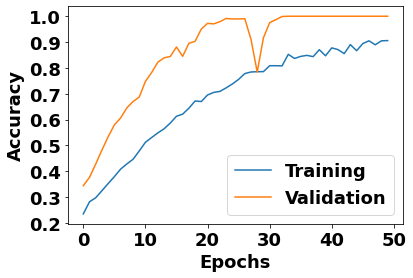

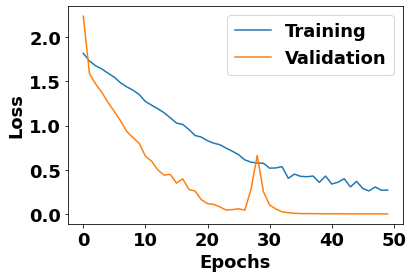

In [99]:
''''fig1 = plt.figure()
plt.plot(train_hist1.history['accuracy'])
plt.plot(valid_hist1.history['accuracy'])

plt.xlabel('Epochs',weight='bold',fontsize=18)

plt.ylabel('Accuracy',weight='bold',fontsize=18)
legend_properties = {'weight':'bold','size':18}
plt.xticks(weight = 'bold',fontsize=18)
plt.yticks(weight = 'bold',fontsize=18)
plt.legend(['Training', 'Validation'], loc='lower right',prop=legend_properties)

plt.show()
fig1.savefig('Journal Paper FSS ANN1/Actuator/Accuracy_VGG16_1',dpi=600,bbox_inches='tight')

fig1 = plt.figure()
plt.plot(train_hist1.history['loss'])
plt.plot(valid_hist1.history['loss'])
plt.xlabel('Epochs',weight='bold',fontsize=18)
plt.xticks(weight = 'bold',fontsize=18)
plt.yticks(weight = 'bold',fontsize=18)
plt.ylabel('Loss',weight='bold',fontsize=18)
plt.legend(['Training', 'Validation'], loc='upper right',prop=legend_properties)
plt.show()
fig1.savefig('Journal Paper FSS ANN1/Actuator/Loss_VGG16_1',dpi=600,bbox_inches='tight')#'''




Model predictions:-

In [21]:
#predictions1 = model1.predict(x=X_test)
#predictions1

array([[4.7319820e-05, 1.7425402e-06, 5.8149032e-02, ..., 1.3100938e-02,
        2.3482423e-03, 4.5311567e-04],
       [1.1608877e-02, 1.0067980e-04, 4.5088625e-05, ..., 9.8823869e-01,
        7.8084295e-09, 5.0686353e-08],
       [6.2564750e-06, 7.6450038e-01, 2.7522510e-03, ..., 2.9482097e-05,
        4.3617915e-10, 1.2183919e-07],
       ...,
       [2.3849226e-11, 2.1598016e-12, 3.8423091e-09, ..., 9.9346513e-01,
        9.9573469e-07, 5.5513247e-03],
       [5.6973938e-02, 1.8450592e-06, 5.2858341e-02, ..., 5.4383365e-04,
        4.0486239e-10, 4.8371840e-10],
       [1.2029435e-07, 5.8514774e-03, 6.8876863e-02, ..., 9.2527020e-01,
        3.7165735e-09, 1.3317067e-06]], dtype=float32)

In [22]:
#y_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [23]:
#predictions1 = np.uint(np.round(predictions1,1))
#pred1 = np.argmax(predictions1,axis=-1)

#y_t1 = np.argmax(y_test,axis=-1)

In [24]:
#print(y_t1)
#print('\n',pred1)

[3 4 2 ... 4 3 2]

 [0 4 0 ... 4 0 0]


Plotting Confusion Matrix for Test datasets to check performance of Model on test data:-

In [25]:
#from sklearn.metrics import confusion_matrix,classification_report

#cm = confusion_matrix(pred1,y_t1)

In [89]:
''''import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    fig1 = plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45,weight='bold')
    plt.yticks(tick_marks, classes,weight='bold')

    if normalize:
        cm = np.round((cm.astype('float') / cm.sum(axis=1)[:, np.newaxis])*100,1) 
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],weight='bold',
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "red")

    plt.tight_layout()
    plt.ylabel('True label',fontsize=16,weight='bold')
    plt.xlabel('Predicted label',labelpad=1,fontsize=16,weight='bold')
    plt.title('Confusion Matrix',weight='bold',fontsize=18)
    fig1.savefig('Journal Paper FSS ANN1/Actuator/Confusion_Matrix_VGG16_1',dpi=600,bbox_inches='tight')#'''

Normalized confusion matrix
[[23.2 14.  15.7 12.5 12.3 14.   8.4]
 [ 7.1 57.1  6.  13.1  7.1  3.6  6. ]
 [ 9.2 26.4 40.2  9.2  8.   4.6  2.3]
 [16.   7.4 13.8 27.7 10.6  9.6 14.9]
 [15.4  2.6 10.3  9.  43.6 10.3  9. ]
 [ 3.2  0.   6.3 12.7 19.  42.9 15.9]
 [ 5.7  4.9  5.7 10.7 19.7  8.2 45.1]]


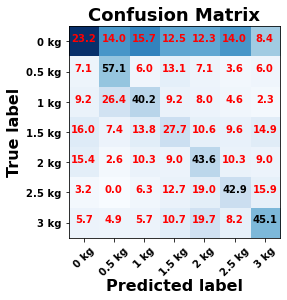

In [90]:

#cm_plot_labels = ['0 kg','0.5 kg','1 kg','1.5 kg','2 kg','2.5 kg','3 kg']

#plot_confusion_matrix(cm = cm,classes = cm_plot_labels,title='Confusion Matrix')

## Similar process for VGG-19 model below:-

In [78]:
#vgg_19 = VGG19(input_shape = (img_size,img_size,3), weights='imagenet',include_top=False)

In [79]:
#vgg_19.trainable = False    

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0     

In [81]:


''''flatten_layer = keras.layers.Flatten()
dense_layer_1 = keras.layers.Dense(400, activation='relu')
dense_layer_2 = keras.layers.Dense(400, activation='relu')
dense_layer_3 = keras.layers.Dense(400, activation='relu')
dense_layer_4 = keras.layers.Dense(400, activation='relu')

prediction_layer = keras.layers.Dense(7, activation='softmax')


model2 = keras.Sequential([
    vgg_19,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    dense_layer_3,
    dense_layer_4,
    prediction_layer
])

model2.summary()#'''

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 3, 3, 512)         20024384  
_________________________________________________________________
flatten_4 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 400)               1843600   
_________________________________________________________________
dense_20 (Dense)             (None, 400)               160400    
_________________________________________________________________
dense_21 (Dense)             (None, 400)               160400    
_________________________________________________________________
dense_22 (Dense)             (None, 400)               160400    
_________________________________________________________________
dense_26 (Dense)             (None, 7)                

In [82]:
#opt = tf.keras.optimizers.Adam(1e-04)

In [83]:
#model2.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [84]:
#start_time = time.time()
#train_hist2 = model2.fit(X_train,y_train,epochs=50,verbose=1)
#print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/50
8400/8400 [==============================] - 9s 1ms/step - loss: 1.8064 - accuracy: 0.2344
Epoch 2/50
8400/8400 [==============================] - 9s 1ms/step - loss: 1.6825 - accuracy: 0.3093
Epoch 3/50
8400/8400 [==============================] - 9s 1ms/step - loss: 1.6111 - accuracy: 0.3486
Epoch 4/50
8400/8400 [==============================] - 9s 1ms/step - loss: 1.5440 - accuracy: 0.3945
Epoch 5/50
8400/8400 [==============================] - 9s 1ms/step - loss: 1.4871 - accuracy: 0.4104
Epoch 6/50
8400/8400 [==============================] - 9s 1ms/step - loss: 1.4190 - accuracy: 0.4492
Epoch 7/50
8400/8400 [==============================] - 9s 1ms/step - loss: 1.3718 - accuracy: 0.4782
Epoch 8/50
8400/8400 [==============================] - 10s 1ms/step - loss: 1.2897 - accuracy: 0.5110
Epoch 9/50
8400/8400 [==============================] - 9s 1ms/step - loss: 1.2172 - accuracy: 0.5413
Epoch 10/50
8400/8400 [==============================] - 9s 1ms/step - loss: 1.13

In [85]:
#start_time = time.time()
#valid_hist2 = model2.fit(X_validation,y_validation,epochs=50,verbose=1)
#print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/50
1050/1050 [==============================] - 1s 1ms/step - loss: 4.1759 - accuracy: 0.2705
Epoch 2/50
1050/1050 [==============================] - 1s 1ms/step - loss: 1.6079 - accuracy: 0.3876
Epoch 3/50
1050/1050 [==============================] - 1s 1ms/step - loss: 1.4219 - accuracy: 0.4886
Epoch 4/50
1050/1050 [==============================] - 1s 1ms/step - loss: 1.3424 - accuracy: 0.5124
Epoch 5/50
1050/1050 [==============================] - 1s 1ms/step - loss: 1.1942 - accuracy: 0.5705
Epoch 6/50
1050/1050 [==============================] - 1s 1ms/step - loss: 1.0615 - accuracy: 0.6181
Epoch 7/50
1050/1050 [==============================] - 1s 1ms/step - loss: 0.9598 - accuracy: 0.6657: 0s - loss: 0.9606 - accu
Epoch 8/50
1050/1050 [==============================] - 1s 1ms/step - loss: 0.9039 - accuracy: 0.6705
Epoch 9/50
1050/1050 [==============================] - 1s 1ms/step - loss: 0.7414 - accuracy: 0.7495
Epoch 10/50
1050/1050 [==============================] -

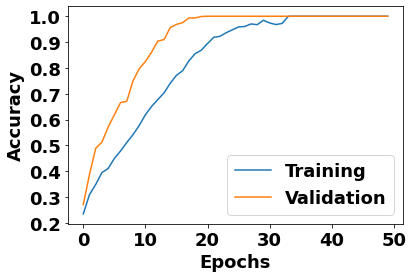

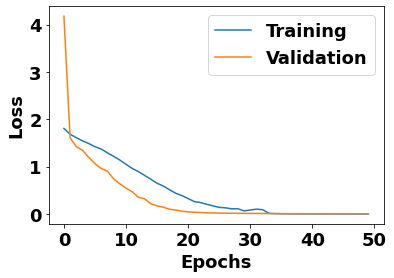

In [100]:
''''fig1 = plt.figure()
plt.plot(train_hist2.history['accuracy'])
plt.plot(valid_hist2.history['accuracy'])

plt.xlabel('Epochs',weight='bold',fontsize=18)

plt.ylabel('Accuracy',weight='bold',fontsize=18)
legend_properties = {'weight':'bold','size':18}
plt.xticks(weight = 'bold',fontsize=18)
plt.yticks(weight = 'bold',fontsize=18)
plt.legend(['Training', 'Validation'], loc='lower right',prop=legend_properties)
plt.show()
fig1.savefig('Journal Paper FSS ANN1/Actuator/Accuracy_VGG_19_1',dpi=600,bbox_inches='tight')

fig1 = plt.figure()
plt.plot(train_hist2.history['loss'])
plt.plot(valid_hist2.history['loss'])
plt.xlabel('Epochs',weight='bold',fontsize=18)

plt.ylabel('Loss',weight='bold',fontsize=18)
legend_properties = {'weight':'bold','size':18}
plt.xticks(weight = 'bold',fontsize=18)
plt.yticks(weight = 'bold',fontsize=18)
plt.legend(['Training', 'Validation'], loc='upper right',prop=legend_properties)
plt.show()
fig1.savefig('Journal Paper FSS ANN1/Actuator/Loss_VGG_19_1',dpi=600,bbox_inches='tight')#'''



In [136]:
#predictions2 = model2.predict(x=X_test)
#predictions2

array([[3.5008019e-10, 1.0199123e-08, 1.1416548e-05, ..., 9.9497223e-01,
        2.1155065e-05, 4.8069428e-03],
       [1.2287225e-14, 1.5377792e-16, 3.8756465e-13, ..., 4.4284264e-12,
        2.5244496e-12, 1.0000000e+00],
       [5.3710753e-01, 4.6214944e-01, 6.7129184e-04, ..., 3.4829238e-05,
        3.5708646e-05, 1.0807332e-06],
       ...,
       [9.9284041e-01, 9.2027371e-04, 6.2821107e-04, ..., 2.3640299e-03,
        2.6144666e-04, 2.5191056e-03],
       [4.1501098e-06, 7.7556900e-04, 9.9877650e-01, ..., 4.4373702e-04,
        2.8120629e-08, 2.7446287e-11],
       [6.6391221e-05, 3.7768562e-03, 1.3756883e-04, ..., 5.5810618e-03,
        9.6785867e-01, 1.4442170e-02]], dtype=float32)

In [137]:
#y_test

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [138]:
#predictions2 = np.uint(np.round(predictions2,1))
#pred2 = np.argmax(predictions2,axis=-1)

#y_t1 = np.argmax(y_test,axis=-1)

In [139]:
#print(y_t1)
#print('\n',pred2)

[4 6 5 ... 0 0 4]

 [4 6 0 ... 0 2 5]


In [140]:
#import numpy as np
#import matplotlib.pyplot as plt
#from sklearn.metrics import confusion_matrix,classification_report

#cm = confusion_matrix(pred2,y_t1)


In [185]:
''''import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    fig1 = plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45,weight='bold')
    plt.yticks(tick_marks, classes,weight='bold')

    if normalize:
        cm = np.round((cm.astype('float') / cm.sum(axis=1)[:, np.newaxis])*100,1) 
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],weight='bold',
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label',fontsize=16,weight='bold')
    plt.xlabel('Predicted label',labelpad=1,fontsize=16,weight='bold')
    plt.title('Confusion Matrix',weight='bold',fontsize=18)

    fig1.savefig('Journal Paper FSS ANN1/Actuator/Confusion_Matrix_VGG19_1',dpi=600,bbox_inches='tight')#'''

Normalized confusion matrix
[[20.9 12.8 13.8 12.6 15.2 14.6 10.2]
 [ 6.7 68.9  6.7  6.7  4.4  2.2  4.4]
 [10.7 14.3 50.1  7.1  7.1  7.1  3.6]
 [12.1  7.6  6.1 40.9 19.7  7.6  6.1]
 [11.3  8.1  4.8 12.9 41.9  6.5 14.5]
 [ 3.3  0.   1.6  4.9 18.  55.8 16.4]
 [ 1.6  0.   3.2  3.2  9.7  6.5 75.8]]


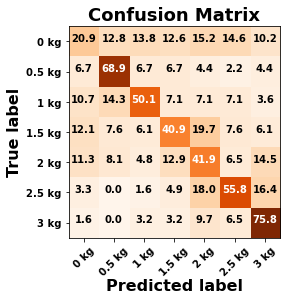

In [186]:
#cm_plot_labels = ['0 kg','0.5 kg','1 kg','1.5 kg','2 kg','2.5 kg','3 kg']

#plot_confusion_matrix(cm = cm,classes = cm_plot_labels,title='Confusion Matrix')